# Tutorial 9 - Web Scraping

## HTTP 协议基础知识
在 HTTP 协议中，状态码是服务器对客户端请求的响应的一部分，用于表示请求的处理结果。状态码是一个三位数字，其中每个数字都有特定的含义。在这些状态码中，200 状态码特别重要，因为它表示请求成功。

### 不同类型的 HTTP 状态码

HTTP 状态码分为几个不同的类别，每个类别代表一组以相同数字开头的状态码：

- 1xx（信息响应）：这类状态码表示临时响应，例如 100（继续）。
- 2xx（成功）：这类状态码表示请求已成功被服务器接收、理解和接受，其中 200（OK）是最常见的成功状态码。
- 3xx（重定向）：这类状态码表示进一步操作需要以完成请求，例如 301（永久移动）。
- 4xx（客户端错误）：这类状态码表示请求包含错误或无法被执行，例如 404（未找到）。
- 5xx（服务器错误）：这类状态码表示服务器在处理请求时发生了错误，例如 500（内部服务器错误）。


# Part A: HTML based scraping



In this part we will look at a few HTML fundamentals to understand how web scraping works and scrape a website for structured data. 

We will cover the following: 
- HTTP Requests to crawl HTML page
- Reading HTML table with Pandas
- Parsing HTML page with BeautifulSoup

## 1. 发送请求
`requests` 支持 HTTP 的各种方法，如 GET、POST、PUT、DELETE 等。最常见的操作是发送 GET 请求来获取网页内容。
get:用于获取网页内容，`requests.get(url)`，表示获取 url 对应的资源。
post:用于提交表单数据，`requests.post(url, data=)`，其中 data 参数是一个字典，包含表单数据的键值对。
put:用于更新资源，`requests.put(url, data=)`，表示用 data 参数中的数据更新 url 对应的资源。
delete:用于删除资源，`requests.delete(url)`，表示删除 url 对应的资源。

`requests.get()`参数设置:
- 添加查询参数,可以通过 params 参数添加查询字符串（URL 参数）：`params = {'key1': 'value1', 'key2': 'value2'}`
- 使用 headers 参数自定义 HTTP 头部：`headers = {'user-agent': 'my-app/0.0.1'}`
    - 自定义 User-Agent 可以模拟浏览器请求或遵守某些 API 的使用规范。
- 通过 proxies 参数设置代理：`proxies = {'http': 'http://10.10.1.10:3128','https': 'http://10.10.1.10:1080',}`
- 使用 timeout 参数设置请求超时时间：`timeout=`

### 关于headers和proxies的设置
1.**使用 headers**\
一般使用`headers ={'User-Agent':'Mozilla/5.0'}`\
目的:\
模拟浏览器请求：一些网站会检查 HTTP 请求的 User-Agent 头部来确定请求是否来自合法的浏览器。通过设置 User-Agent，您可以模拟浏览器请求。\
遵守 API 规范：某些 API 需要在请求头部中包含特定的信息，如 API 密钥、接受的响应格式等。\
处理缓存和语言：通过设置如 If-Modified-Since 和 Accept-Language 等头部，可以控制缓存行为或请求特定语言的内容。

常见headers：
- User-Agent: 用于标识请求的客户端信息，如浏览器类型、操作系统、软件版本等。如：Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36。
- Accept: 用于指定客户端能够接收的内容类型，如 text/html、application/json 等。
- Accept-Language: 用于指定客户端能够接收的语言类型，如 zh-CN、en-US 等。
- Accept-Encoding: 用于指定客户端能够接收的内容编码类型，如 gzip、deflate 等。

场景:\
爬虫：爬取网页时，为避免被服务器识别为爬虫而被屏蔽，可以通过更改 User-Agent 来模拟不同的浏览器。\
访问 REST API：当使用 REST API 时，一些服务要求在头部中包含特定的认证信息（如 Token）。\
国际化内容获取：当需要请求特定语言的内容时，可以通过修改 Accept-Language 头部来实现。

2.**使用 proxies**\
目的:\
绕过地理限制：通过使用位于不同地理位置的代理服务器，可以访问在某些地区被限制或屏蔽的内容。\
增加匿名性：使用代理可以隐藏您的真实 IP 地址，增加请求的匿名性。\
负载均衡和避免速率限制：在发送大量请求时，通过不同的代理分散请求可以避免触发 IP 速率限制。

场景:\
内容抓取：在爬取对 IP 地址敏感的网站时使用，可以减少被封禁的风险。\
访问特定地区的服务：如果某些服务或内容仅在特定地区可用，可以通过该地区的代理来访问。\
安全和隐私：当需要保护请求的隐私或安全性时，使用代理服务器可以提高安全性。

常见代理类型:
- HTTP 代理：用于 HTTP 请求的代理服务器。`proxies = {'http': 'http://...}`
- HTTPS 代理：用于 HTTPS 请求的代理服务器。`proxies = {'https': 'https://...}`
- SOCKS 代理：用于任何类型的请求的代理服务器。`proxies = {'http': 'socks5://...}`



In [1]:
import requests

url = 'http://example.com'
response = requests.get(url)

## 2. 处理响应
响应对象 response 包含了服务器返回的所有信息，如状态码、头信息、内容等。
- response.status_code: 返回状态码（如 200、404）。
- response.headers: 返回头信息。
- response.text: 返回响应内容的字符串形式。
- response.content: 返回响应内容的二进制形式。
- response.json(): 如果响应是 JSON 格式，可以直接解析为字典。

使用`json.dumps(response.json())`，得到格式化后的 JSON 输出，这有助于更好地理解和分析数据。

In [ ]:
#美化打印 JSON 数据：
import json

print(json.dumps(response.json(), indent=4))

# json.dumps(): 这个函数将 Python 对象转换为 JSON 格式的字符串。
# indent=4: 这个参数指定了字符串的缩进级别，使输出的 JSON 数据更易于阅读。
# print(...): 打印美化后的 JSON 字符串。

## 3. pd.read_html()
使用pandas的read_html函数直接获取指定url网页中的所有表格,它会搜索 HTML 中的 `<table>` 标签，并尝试将它们解析为 DataFrame 对象。这个函数特别适合用于快速提取网页上格式良好的表格数据，而无需进行复杂的 HTML 解析或爬虫编程。

如果 HTML 中包含多个表格，read_html() 会返回一个 DataFrame **列表**，列表中的每个元素 对应一个表格。

灵活性：该函数可以处理来自网页 URL 或本地 HTML 文件的内容，也可以处理已经加载到字符串变量中的 HTML 内容。
- `read_html('url')`:获取指定网页url的内容
- `response=requests.get()`\
`read_html(response.text)`:获取通过get()得到的requests对象内容的text字符串形式,并转换为df




#### 限制
- 只限表格：read_html() 只能提取 `<table>` 标签内的数据，无法处理其他类型的 HTML 内容或结构。
- 格式依赖：对于复杂或格式不规则的表格，read_html() 可能无法正确解析，或者需要额外的清洗和格式化工作。
- 不含复杂互动：无法处理 JavaScript 生成或动态加载的内容，仅适用于静态 HTML 页面中的表格。

In [38]:
# EX1:直接获取url的内容

import pandas as pd
df = pd.read_html('https://en.wikipedia.org/wiki/Minnesota')
print(df[2])
print('total tables:',len(df),'\n') #该网页共有29个表格
df[2].info

              Location July (°F) July (°C) January (°F) January (°C)
0          Minneapolis     83/64     28/18         23/7       −4/−13
1           Saint Paul     83/63     28/17         23/6       −5/−14
2            Rochester     82/63     28/17         23/3       −5/−16
3               Duluth     76/55     24/13         19/1       −7/−17
4            St. Cloud     81/58     27/14        18/−1       −7/−18
5              Mankato     86/62     30/16         23/3       −5/−16
6  International Falls     77/52     25/11        15/−6       −9/−21
total tables: 29 


<bound method DataFrame.info of               Location July (°F) July (°C) January (°F) January (°C)
0          Minneapolis     83/64     28/18         23/7       −4/−13
1           Saint Paul     83/63     28/17         23/6       −5/−14
2            Rochester     82/63     28/17         23/3       −5/−16
3               Duluth     76/55     24/13         19/1       −7/−17
4            St. Cloud     81/58     27/14        18/−1       −7/−18
5              Mankato     86/62     30/16         23/3       −5/−16
6  International Falls     77/52     25/11        15/−6       −9/−21>

In [53]:
#EX2: 获取requests对象的字符串内容
url = 'https://finance.yahoo.com/quote/NFLX/history?p=NFLX%27'
r = requests.get(url,headers ={'User-Agent':'Mozilla/5.0'})

read_html_pandas_data = pd.read_html(r.text) #得到一个list,每个元素为一个table,这个网页只有一个table

df=read_html_pandas_data[0]
df.head(5)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Nov 17, 2023",466.95,467.65,462.76,465.68,465.68,1526058
1,"Nov 16, 2023",463.00,467.28,459.65,466.95,466.95,3653200
2,"Nov 15, 2023",452.81,462.75,452.45,461.94,461.94,5035300
3,"Nov 14, 2023",448.78,454.08,445.64,448.65,448.65,4060900
4,"Nov 13, 2023",447.25,448.43,442.60,444.62,444.62,2896100


# Parsing HTML page with BeautifulSoup:
You might need to parse HTML for information that are not represented in tables.

In [69]:
# ! pip install bs4 # beautifulsoup库,用于解析html文本
# ! pip install lxml # lxml 解析器，速度更快,可用于创建bs4对象时使用

from bs4 import BeautifulSoup

## step 1. 使用requests获取html文本<big>
- `response=requests.get(url)`
- `content=response.content` 或`text=response.text` response.content 返回的是字节类型的数据（适用于包含非 UTF-8 编码字符的响应），而 response.text 返回的是字符串类型的数据。</big>

In [73]:
url = 'https://www.luckytailsalpacafarm.co.uk/'
response = requests.get(url)

print('Status code\n', response.status_code)

print('Content of the website\n', response.content[:200])

Status code
 200
Content of the website
 b'<!DOCTYPE html>\n<html lang="en">\n<head>\n  \n  <meta charset=\'utf-8\'>\n  <meta name="viewport" content="width=device-width, initial-scale=1" id="wixDesktopViewport" />\n  <meta http-equiv="X-UA-Compatible'


## step 2. 创建bs4对象<big>
- `soup_object = BeautifulSoup(response.text/content)`

In [78]:
soup_obj=BeautifulSoup(response.text)
print(soup_obj.prettify()) # 结构化输出html文本内容

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" id="wixDesktopViewport" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="Wix.com Website Builder" name="generator"/>
  <link href="https://static.parastorage.com/client/pfavico.ico" rel="icon" sizes="192x192" type="image/x-icon"/>
  <link href="https://static.parastorage.com/client/pfavico.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="https://static.parastorage.com/client/pfavico.ico" rel="apple-touch-icon" type="image/x-icon"/>
  <!-- Safari Pinned Tab Icon -->
  <!-- <link rel="mask-icon" href="https://static.parastorage.com/client/pfavico.ico"> -->
  <!-- Legacy Polyfills -->
  <script nomodule="" src="https://static.parastorage.com/unpkg/core-js-bundle@3.2.1/minified.js">
  </script>
  <script nomodule="" src="https://static.parastorage.com/unpkg/focus-within-polyfill@5.0.9/dist/focus-within-polyfill.js">


## step 3. 对bs4对象进行操作获取需要的信息
<big>part1:
- `soup.get_text()` 提取文档中所有文本内容。
- `soup.title` 获取 HTML 文档的 `<title>` 元素。
- `soup.head` 获取 HTML 文档的`<head>` 部分。
- `soup.body` 获取 HTML 文档的 `<body>` 部分。
- `soup.find('tag')` 查找文档中符合条件的第一个元素。
- `soup.find_all('tag')` 查找文档中符合条件的所有元素。

<big>part2:
- `soup.p` 获取 HTML 文档中的第一个 `<p>` 元素,可以用`find('p')`。同样可以用`soup.a`获取第一个`<a>`元素等
- `soup.children` 和 `soup.descendants`
    - `soup.children`: 返回直接子节点的迭代器。
    - `soup.descendants`: 返回所有后代节点的迭代器。
- `soup.parent` 和 `soup.parents`
    - `soup.parent`: 返回元素的直接父节点。
    - `soup.parents`: 返回所有祖先节点的迭代器。
- `soup.next_sibling` 和 `soup.previous_sibling`
    - `soup.next_sibling`: 获取同级的下一个元素。
    - `soup.previous_sibling`: 获取同级的上一个元素。

# Part B: APIs Based Scarping
## API 爬取
API（应用程序编程接口）爬取是指使用特定网站或服务提供的 API 来获取数据。API 是一种标准化的方式，允许不同软件应用间进行通信。API 爬取通常涉及向 API 发送 HTTP 请求并接收返回的数据。

优点：

结构化数据：API 通常返回结构化格式（如 JSON 或 XML），便于解析和处理。
高效准确：API 直接提供数据，无需解析 HTML，因此通常更准确和高效。
易于使用：许多 API 设计得用户友好，有清晰的文档和使用指南。

缺点：

访问限制：一些 API 可能有使用限制，如请求次数限制、认证要求等。
数据限制：API 提供的数据可能受限于提供者的决策，可能不包括网页上所有可见的信息

![image.png](attachment:image.png)

## EXAMPLE 1: Wikipedia API
### 1. 相关库的安装
- wikipedia: 一个 Python 库，可以方便地访问和解析 Wikipedia（维基百科）上的数据。
- wordcloud: 一个用于生成词云的 Python 库。词云是文本数据的视觉表示，其中字体大小表示单词的频率或重要性。
- requests: 一个简单易用的 HTTP 库，用于在 Python 中发送 HTTP 请求。

In [1]:
# sudo apt install libcurl4-openssl-dev libssl-dev
!pip install wikipedia
!pip install wordcloud
!pip install requests

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=511c6947fc2cebb69eb7f6493e349eb1ef9a3fec2e9070871e128a28727aaefa
  Stored in directory: c:\users\yhb\appdata\local\pip\cache\wheels\c2\46\f4\caa1bee71096d7b0cdca2f2a2af45cacf35c5760bee8f00948
Successfully built wikipedia
     -------------------------------------- 153.3/153.3 kB 2.3 MB/s eta 0:00:00


### 2. `wikipedia.search()` 用于搜索Wikipedia页面
`wikipedia.search(query, results=, suggestion=T/F)`:
- query: 搜索的关键词，这里是“University of Bristol”。
- results=: 指定返回的搜索结果数量.
- suggestion=True: 指示搜索时返回一个建议（如果 Wikipedia 有更好的搜索建议）。
- print(...): 将 wikipedia.search 返回的结果输出到控制台。

执行这段代码后，您将看到关于“University of Bristol”的前五个最相关的 Wikipedia 条目列表，以及一个可能的搜索建议（如果 Wikipedia 的搜索算法认为有更合适的搜索关键词）。这个功能在进行数据收集或者研究的时候特别有用，因为它可以快速提供一个主题的相关信息和资源。

In [7]:
import json
import wikipedia
import pandas as pd

print(wikipedia.search("University of Bristol"))
print(wikipedia.search("University of Bristol", results=3, suggestion=True))

['University of Bristol', 'University of the West of England', 'Bristol', 'University College, Bristol', 'List of University of Bristol people', 'Bristol stool scale', 'Diamond battery', "University of Bristol Students' Union", 'Academic dress of the University of Bristol', 'Bristol Old Vic Theatre School']
(['University of Bristol', 'University of the West of England', 'Bristol'], None)


### 3. `wikipedia.summary()` 获取页面摘要
`wikipedia.summary(title, sentences=0, chars=0, auto_suggest=True, redirect=True)`
- title: 要摘要的页面标题。
- sentences: 返回的摘要包含的句子数量（如果指定）。
- chars: 返回的摘要包含的字符数量（如果指定）。
- auto_suggest: 自动建议更准确的标题（如果原始标题不准确）。
- redirect: 自动重定向到正确的标题（如果原始标题是重定向）。

In [6]:
print(wikipedia.summary("University of Bristol",sentences=1))

The University of Bristol is a red brick Russell Group research university in Bristol, England.


### 4. `wikipedia.page()`获取页面详细内容
`wikipedia.page(title=None, pageid=None, auto_suggest=True, redirect=True, preload=False)`
- title: 页面标题。
- pageid: Wikipedia页面的ID（如果已知）。
- auto_suggest: 自动建议更准确的标题。
- redirect: 自动重定向到正确的标题。
- preload: 预加载页面内容

该函数返回一个WikipediaPage对象,可以对其使用下面attribute:
1. title 页面的标题。

2. url 页面的 URL。

3. content 页面的全部文本内容。

4. summary 获取页面的简短摘要。

5. images 获取页面中包含的所有图像的 URL。

6. links 获取页面中包含的所有链接的标题。

7. categories 获取页面所属的 Wikipedia 分类。

8. sections 获取页面中的所有章节标题。

9. section(title) 获取页面中特定章节的内容。


## EXAMPLE 2: Reddit API
### Step 1: Send a specific request. The server will return information in a structured format
代码结构
导入 requests 库：首先导入用于 HTTP 请求的 requests 库。

设置参数：

- subreddit: 指定要查询的子版块名称。
- limit: 指定要检索的帖子数量限制。
- timeframe: 设定时间范围（例如过去一年）。
- listing: 帖子的类别（如最受争议、最佳、热门、新帖、随机、上升、顶部）。

定义 get_reddit 函数：

- 构造请求的 URL。
- 发送 GET 请求到 Reddit API。
- 使用自定义的用户代理（User-agent）。
- 异常处理：如果请求过程中发生异常，打印错误消息。
- 返回响应对象。

调用函数：使用定义的参数调用 get_reddit 函数，并将结果存储在变量 r 中。

使用说明:此脚本的目的是以编程方式从 Reddit 获取帖子数据

In [10]:
import requests
 
subreddit = 'python'
limit = 100
timeframe = 'year' #hour, day, week, month, year, all
listing = 'top' # controversial, best, hot, new, random, rising, top
 
def get_reddit(subreddit, listing, limit, timeframe):
    try:
        base_url = f'https://www.reddit.com/r/{subreddit}/{listing}.json?limit={limit}&t={timeframe}'
        request = requests.get(base_url, headers = {'User-agent': 'SDPA-2023'})
    except:
        print('An Error Occured')
    return request
 
r = get_reddit(subreddit,listing,limit,timeframe)

### Step 2: Parsing JSON In Python

In [11]:
import json
data = json.loads(r.content)
data

# data是一个字典形式,其中最外层data键包括的值有'children', 'children'是一个列表,该列表每个元素是一个帖子,内嵌字典'data'

{'kind': 'Listing',
 'data': {'after': 't3_ztqgnt',
  'dist': 100,
  'modhash': '',
  'geo_filter': '',
  'children': [{'kind': 't3',
    'data': {'approved_at_utc': None,
     'subreddit': 'Python',
     'selftext': '\n\n"I didn\'t have time to write a short letter, so I wrote a long one instead."\n\nThis is a long one, so I\'m putting the TLDR up top:\n\n# TLDR\nA blackout has been proposed for June 12-14 to protest the API changes and extreme cost. \n\nThe r/Python community seems very vocal about joining the blackout and I would like the r/Python community\'s input on this. Would you like to participate? How would you like to participate? \n\nIf we do join the blackout, there are two different ways to participate which we need:\n- Setting the subreddit to private (no engagement at all--including no ability to explain why our sub is private)\n- Turning off submissions (the community and posts are still viewable, but no new comments or posts)\n\nPlease offer your feedback here, this 

### Step 3: Extract title
处理从 Reddit API 获取的数据，提取每个帖子的标题并将它们存储在一个 NumPy 数组中

In [12]:
import numpy as np

temp = []
for i in range(limit):
    temp.append(data['data']['children'][i]['data']['title'])
title = np.array(temp)
title


# data['data']['children'][i]['data']['title']: 这部分代码是从一个嵌套的字典结构中提取特定信息。
# 假设 data 是从 Reddit API 返回的 JSON 响应转换而来的 Python 字典，那么：
    # data['data'] 访问字典中键为 'data' 的子字典。
    # ['children'][i] 访问 'children' 键对应的列表中的第 i 个元素（在这个上下文中，每个元素代表一个 Reddit 帖子）。
    # ['data']['title'] 访问每个帖子的 'data' 字典，然后从中获取帖子的标题。
# 综上所述，temp.append(data['data']['children'][i]['data']['title']) 这行代码的作用是
# 将从 Reddit API 获取的每个帖子的标题添加到列表 temp 中。
# 这是处理 API 响应并提取有用数据的常见方法。在循环中使用这行代码可以遍历所有帖子并收集它们的标题。

array(['Should r/Python participate in the June 12th Blackout protesting the API changes',
       'The Python Mega Course is now free on Udemy',
       'Going dark on 12th June',
       'at 44, I am struggling on Python for two months now but I keep at it. 2 hours a night, after the kids sleep, I work on it and will eventually be able to use it to get a better job, a better life for them.',
       'You should know these f-string tricks',
       'Spent Months Writing A Web Dev Course For A Platform, But It Got Canceled Midway. Publishing It Free For The Community.',
       'Detailed Python developer roadmap',
       'We are the developers behind pandas, currently preparing for the 2.0 release :) AMA',
       "I'm banned for life from advertising on Meta. Because I teach Python",
       'TechCrunch | Python 4 To Be Renamed to Viper And Introduce TypeScript support',
       'I’m developing a programming game where you use Python to automate all kinds of machines, robots, drones and more a

## 一般情况下Reddit API的调用方式
#### 注册和获取凭证
要使用 Reddit API，首先需要注册一个 Reddit 账户并创建一个应用程序以获取 API 密钥（客户端 ID 和客户端密钥）。

- 注册账户：在 Reddit 注册一个账户。
- 创建应用程序：登录后，转到 Reddit App 页面 并创建一个新应用程序。这将生成客户端 ID 和客户端密钥。
- OAuth 认证: Reddit API 使用 OAuth 2.0 认证，这意味着您需要获取访问令牌才能发送请求。
    - 使用客户端 ID、客户端密钥和所需的权限范围获取访问令牌。
    - 将访问令牌用于后续请求的认证。
    - API 调用
    
一旦获得访问令牌，您就可以开始调用 Reddit API。API 提供了许多端点，用于访问不同类型的数据。

In [13]:
import requests

# 设置用户代理和认证信息
headers = {
    'User-Agent': 'MyAPI/0.0.1',
    'Authorization': 'bearer YOUR_ACCESS_TOKEN',  # 替换为您的访问令牌
}

# 请求 URL
url = 'https://oauth.reddit.com/r/python/new'  # 获取 Python 子版块的最新帖子

# 发送请求
response = requests.get(url, headers=headers)

# 处理响应
if response.status_code == 200:
    data = response.json()
    for post in data['data']['children']:
        print(post['data']['title'])
else:
    print("Failed to retrieve data")


Failed to retrieve data


## EXAMPLE 3:  Foursquare API

Foursquare API 是由 Foursquare 提供的一组编程接口，允许开发者访问和利用 Foursquare 的数据和服务。Foursquare 是一个基于位置的社交网络服务，用户可以通过该服务分享和保存他们喜欢的地点，同时探索周围的兴趣点。

### 1.Install necessary packages<big>
- geopy 库，它用于地理编码（将地址转换为经纬度）
    - 从 geopy 库中导入 Nominatim 类，这是一个用于地理编码的工具。
- 导入用于显示图像的库：
    - from IPython.display import Image:  导入 Image 类，用于在 IPython 环境中显示图像。
    - from IPython.core.display import HTML:  导入 HTML 类，用于在 IPython 环境中渲染 HTML。
    
- 安装和导入 folium：
    - !pip -q install folium: 安装 folium 库，它是一个用于创建交互式地图的 Python 库。
    - import folium: 导入 folium 库。

In [15]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# !conda install -c conda-forge geopy --yes 
!pip -q install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library in old pandas version
# from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
!pip -q install folium
import folium # plotting library

### 2. 获取Foursquare Credentials and Version

在 https://foursquare.com/developers/ 创建账户并获取API key
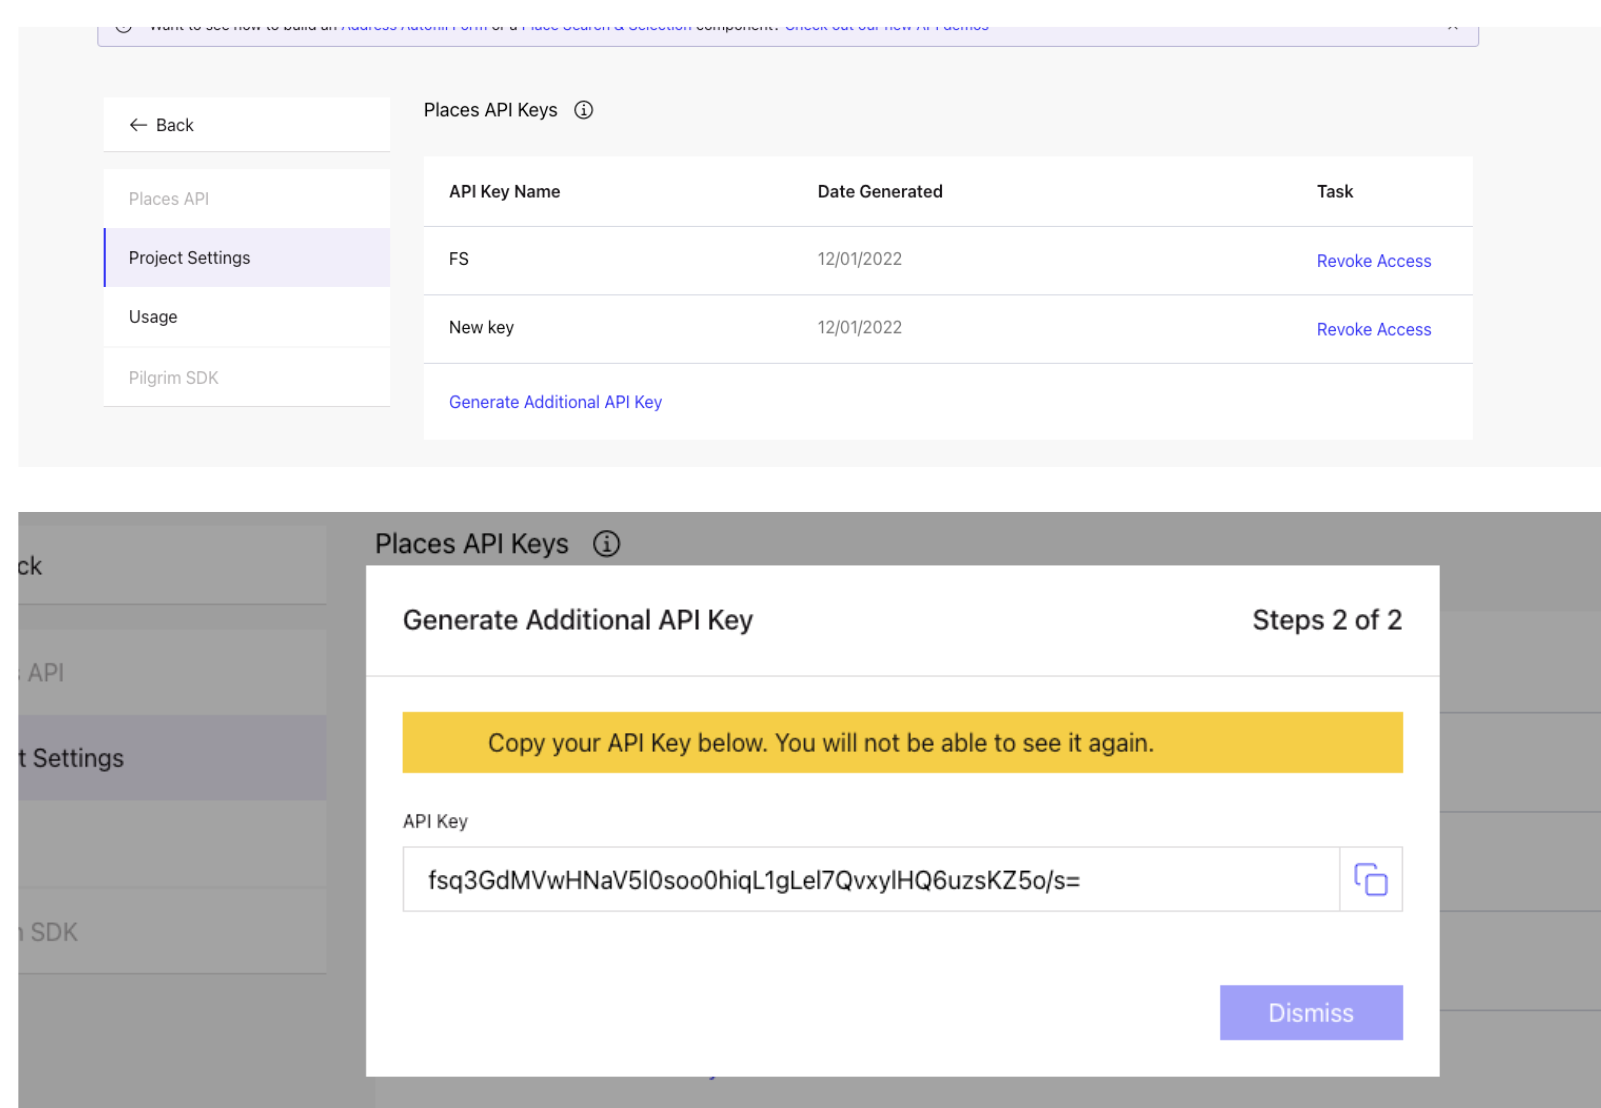

### 3. 发送请求
设置 API 请求的 URL：\
"https://api.foursquare.com/v3/places/search"： 这是 Foursquare API 的地点搜索端点。

定义请求参数 params：
- query: 搜索查询，这里是 "coffee"。
- near: 指定搜索地点，这里是 "Bristol,UK"。
- open_now: 设置为 "true"，意味着搜索当前开放的地点。
- sort: 设置为 "DISTANCE"，按距离排序搜索结果。

设置请求头 headers：
- "Accept": "application/json"：指定期望的响应格式为 JSON。
- "Authorization"：包含您的 Foursquare API 密钥。

发起 GET 请求：
- 使用 requests.request 方法发起 GET 请求，并将 url、params 和 headers 传递给该方法。

这是调用地点相关 API 的一个很好的示例，可以用于获取特定地区的特定类型的场所信息。\
这个示例为获取Bristol附近,开放的coffee地点,按distance进行排序

In [19]:
import requests

url = "https://api.foursquare.com/v3/places/search"

#What parameters, in this example, coffee shops near Bristol that is open now, sorted by distance. 
#check the list of parameters here https://location.foursquare.com/developer/reference/place-search
params = {
  	"query": "coffee",
  	"near": "Bristol,UK",
  	"open_now": "true",
  	"sort":"DISTANCE",
}

headers = {
    "Accept": "application/json",
    #your API key in the above screenshot
    "Authorization": "fsq3AT4h2SjhPIGBYfMa8fk9g6Mj7oqpUs8Cwur/pq4VyKc="
}

#Display the response
response = requests.request("GET", url, params=params, headers=headers)
print(response.text)


{"results":[{"fsq_id":"57f6732c498e8e66e2408604","categories":[{"id":13034,"name":"Café","short_name":"Café","plural_name":"Cafés","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/food/cafe_","suffix":".png"}},{"id":13035,"name":"Coffee Shop","short_name":"Coffee Shop","plural_name":"Coffee Shops","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_","suffix":".png"}},{"id":13236,"name":"Italian Restaurant","short_name":"Italian","plural_name":"Italian Restaurants","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/food/italian_","suffix":".png"}}],"chains":[],"closed_bucket":"Unsure","distance":50,"geocodes":{"main":{"latitude":51.455178,"longitude":-2.595605},"roof":{"latitude":51.455178,"longitude":-2.595605}},"link":"/v3/places/57f6732c498e8e66e2408604","location":{"address":"Creswicke House 9 Small St","admin_region":"England","country":"GB","cross_street":"","formatted_address":"Creswicke House 9 Small St, Bristol, BS1 1DB","locality":"Bristol",

### 4. 将获取json文件转化成dataframe
`response.json()`: 将 Foursquare API 响应的内容从 JSON 格式转换为 Python 字典。\
    `["results"]`: 访问字典中的 results 键，它包含实际的地点数据。
    
`pd.json_normalize(results)`: 使用 Pandas 的 json_normalize 方法来平展 JSON 数据并转换为 Pandas 数据帧。这个方法特别适合处理嵌套的 JSON 数据结构。

In [20]:
results = response.json()["results"]

dataframe = pd.json_normalize(results)
dataframe.head()

,fsq_id,categories,chains,closed_bucket,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,...,location.admin_region,location.country,location.cross_street,location.formatted_address,location.locality,location.post_town,location.postcode,geocodes.drop_off.latitude,geocodes.drop_off.longitude,location.region
0,57f6732c498e8e66e2408604,"[{'id': 13034, 'name': 'Café', 'short_name': '...",[],Unsure,50,/v3/places/57f6732c498e8e66e2408604,Caffe Vero,Europe/London,51.455178,-2.595605,...,England,GB,,"Creswicke House 9 Small St, Bristol, BS1 1DB",Bristol,Bristol,BS1 1DB,NaN,NaN,NaN
1,5740b002498ea9657c51f314,"[{'id': 10018, 'name': 'Gaming Cafe', 'short_n...",[],VeryLikelyOpen,102,/v3/places/5740b002498ea9657c51f314,Chance and Counters Leeds Limited,Europe/London,51.456063,-2.596306,...,England,GB,,"20 Christmas Steps, Bristol, BS1 5BS",Bristol,Bristol,BS1 5BS,51.456060,-2.596409,Bristol
2,55756a41498ecb998453382c,"[{'id': 13003, 'name': 'Bar', 'short_name': 'B...",[],LikelyOpen,151,/v3/places/55756a41498ecb998453382c,Colston Street Bar & Kitchen,Europe/London,51.454663,-2.598384,...,England,GB,,"Colston Hall Colston St, Bristol, BS1 5AR",Bristol,Bristol,BS1 5AR,NaN,NaN,NaN
3,629a218044a1bb2706a9a47b,"[{'id': 13034, 'name': 'Café', 'short_name': '...",[],VeryLikelyOpen,163,/v3/places/629a218044a1bb2706a9a47b,Great Bunnies,Europe/London,51.456364,-2.598349,...,England,GB,,"5 Perry Rd, Bristol",Bristol,Bristol,NaN,51.456270,-2.598288,Bristol
4,50bf9d9c19a9602c207d364f,"[{'id': 13035, 'name': 'Coffee Shop', 'short_n...",[],LikelyOpen,164,/v3/places/50bf9d9c19a9602c207d364f,Small Street Espresso,Europe/London,51.454832,-2.594233,...,England,GB,NaN,"23 Small St, Bristol, BS1 1DW",Bristol,Bristol,BS1 1DW,51.454712,-2.594300,Bristol


### 5. 绘制地图
设置地址：\
`address = 'University of Bristol'`\
这里将要查询的地点设置为 “University of Bristol”。

初始化 Nominatim 地理编码器：\
`geolocator = Nominatim(user_agent="foursquare_agent")`\
使用 Nominatim 类创建一个地理编码器实例。user_agent 参数是必需的，用于标识您的应用程序。在这个例子中，它被命名为 "foursquare_agent"。

获取地点的地理信息：\
`location = geolocator.geocode(address)`\
调用 geocode 方法并传入地址字符串，从而查询该地址的地理信息。这通常返回一个包含地址、经度和纬度等信息的位置对象。

提取经度和纬度：\
`latitude = location.latitude`\
`longitude = location.longitude`\
从 location 对象中提取 latitude（纬度）和 longitude（经度）属性。

In [21]:
#Getting lat and long for any location, pass the name, postcode and get log, lat
address = 'University of Bristol'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print(latitude, longitude)

51.4905582 -2.6304824978595356


In [79]:
# 创建 folium 地图对象：
# 使用 folium.Map 创建一个地图对象，其中心定位于“University of Bristol”的经纬度（由 latitude 和 longitude 变量提供）。
# zoom_start=13 设置了地图的初始缩放级别。
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

# 在地图上添加一个红色的圆形标记，位置为大学的经纬度。
# popup='Conrad Hotel' 提供了标记的弹出信息（这里应更正为 'University of Bristol'）。
# fill_color 和 fill_opacity 设置了圆形标记的填充颜色和透明度。
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the cafe  as blue circle markers
# 使用 for 循环遍历 dataframe 中的每一行。
# 对于每个咖啡店（由 dataframe 中的经纬度和类别提供），在地图上添加一个蓝色的圆形标记。
for lat, lng, label in zip(dataframe['geocodes.main.latitude'], dataframe['geocodes.main.longitude'], dataframe.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map